In [3]:
import sys
import math
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from data_utils import plot_decision_boundary, load_planar_dataset, load_extra_datasets




In [4]:
%matplotlib inline

In [5]:
X, Y = load_planar_dataset()

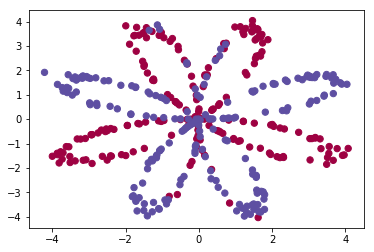

In [6]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Import module that contains the activation functions and their derivatives.

## Model Initialization

### Random Initialization

In [7]:
#ADD He INITIALIZATION METHOD
def initialize_params_random(net_dims):
    """
    Arguments:
    net_dims -- list containing the dimensions of the network's layers i.e. number of hidden units in each layer
    
    Returns:
    parameters -- dictionary containing initialized parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (net_dims[l], net_dims[l-1])
                    bl -- bias vector of shape (net_dims[l], 1)
    """
    
    np.random.seed(3)
    params = {}
    L = len(net_dims)            # number of layers in the network, including input
    # Initialize params for each layer of the network, excluding the input layer
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(net_dims[l], net_dims[l-1]) * 0.01
        params['b' + str(l)] = np.zeros((net_dims[l], 1))

    return params

In [8]:
#Tests
params = initialize_params_random([5,4,3])
print(params)

{'W1': array([[ 0.01788628,  0.0043651 ,  0.00096497, -0.01863493, -0.00277388],
       [-0.00354759, -0.00082741, -0.00627001, -0.00043818, -0.00477218],
       [-0.01313865,  0.00884622,  0.00881318,  0.01709573,  0.00050034],
       [-0.00404677, -0.0054536 , -0.01546477,  0.00982367, -0.01101068]]), 'b1': array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.]]), 'W2': array([[-0.01185047, -0.0020565 ,  0.01486148,  0.00236716],
       [-0.01023785, -0.00712993,  0.00625245, -0.00160513],
       [-0.00768836, -0.00230031,  0.00745056,  0.01976111]]), 'b2': array([[ 0.],
       [ 0.],
       [ 0.]])}


### Xavier Initialization

In [9]:
def initialize_params_xavier(net_dims):
    """
    Arguments:
    net_dims -- list containing the dimensions of the network's layers i.e. number of hidden units in each layer
    
    Returns:
    parameters -- dictionary containing initialized parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (net_dims[l], net_dims[l-1])
                    bl -- bias vector of shape (net_dims[l], 1)
    """
    
    np.random.seed(3)
    params = {}
    L = len(net_dims)            # number of layers in the network, including input
    # Initialize params for each layer of the network, excluding the input layer
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(net_dims[l], net_dims[l-1]) / np.sqrt(net_dims[l-1])
        params['b' + str(l)] = np.zeros((net_dims[l], 1))
        
        assert(params['W' + str(l)].shape == (net_dims[l], net_dims[l-1]))
        assert(params['b' + str(l)].shape == (net_dims[l], 1))

        
    return params

In [10]:
test_params = initialize_params_xavier([2, 5, 5, 1])

In [11]:
len(test_params) // 2

3

In [12]:
test_params

{'W1': array([[ 1.26475132,  0.30865908],
        [ 0.06823401, -1.31768833],
        [-0.19614308, -0.25085248],
        [-0.05850706, -0.44335643],
        [-0.03098412, -0.33744411]]),
 'W2': array([[-0.58757818,  0.39561516,  0.39413741,  0.76454432,  0.02237573],
        [-0.18097724, -0.24389238, -0.69160568,  0.43932807, -0.49241241],
        [-0.52996892, -0.09196943,  0.66462575,  0.10586273, -0.45785063],
        [-0.31886025,  0.27961805, -0.07178376, -0.34383407, -0.10287287],
        [ 0.33319929,  0.88374361, -0.55638887, -0.28014216, -0.35945513]]),
 'W3': array([[-1.08184688, -0.41313235, -0.45789116,  0.50265822, -0.05899384]]),
 'b1': array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b3': array([[ 0.]])}

### He Initialization

In [13]:
def initialize_params_he(net_dims):
    """
    Arguments:
    net_dims -- list containing the dimensions of the network's layers i.e. number of hidden units in each layer
    
    Returns:
    parameters -- dictionary containing initialized parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (net_dims[l], net_dims[l-1])
                    bl -- bias vector of shape (net_dims[l], 1)
    """
    
    np.random.seed(3)
    params = {}
    L = len(net_dims)            # number of layers in the network, including input
    # Initialize params for each layer of the network, excluding the input layer
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(net_dims[l], net_dims[l-1]) * np.sqrt(2 / net_dims[l-1])
        params['b' + str(l)] = np.zeros((net_dims[l], 1))
        
    return params

In [42]:
#Tests
params = initialize_params_he([5,4,3])
params["W"+str(2)].shape

(3, 4)

### Glorot Initialization

In [15]:
def initialize_params_glorot(net_dims):
    """
    Arguments:
    net_dims -- list containing the dimensions of the network's layers i.e. number of hidden units in each layer
    
    Returns:
    parameters -- dictionary containing initialized parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (net_dims[l], net_dims[l-1])
                    bl -- bias vector of shape (net_dims[l], 1)
    """
    
    np.random.seed(3)
    params = {}
    L = len(net_dims)            # number of layers in the network, including input
    # Initialize params for each layer of the network, excluding the input layer
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(net_dims[l], net_dims[l-1]) * np.sqrt(2 / (net_dims[l-1] + net_dims[l]))
        params['b' + str(l)] = np.zeros((net_dims[l], 1))
        
    return params

In [16]:
#Tests
params = initialize_params_glorot([5,4,3])
print(params)

{'W1': array([[ 0.84316755,  0.20577272,  0.04548934, -0.87845888, -0.13076205],
       [-0.16723499, -0.03900471, -0.29557095, -0.02065608, -0.22496274],
       [-0.61936178,  0.41701499,  0.41545731,  0.80590047,  0.02358609],
       [-0.19076676, -0.25708514, -0.7290164 ,  0.46309245, -0.51904826]]), 'b1': array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.]]), 'W2': array([[-0.63343401, -0.1099245 ,  0.79437971,  0.12653017],
       [-0.54723618, -0.3811109 ,  0.33420749, -0.085798  ],
       [-0.41096032, -0.12295659,  0.39824933,  1.05627564]]), 'b2': array([[ 0.],
       [ 0.],
       [ 0.]])}


### LeCun Initialization

In [17]:
def initialize_params_lecun(net_dims):
    """
    Arguments:
    net_dims -- list containing the dimensions of the network's layers i.e. number of hidden units in each layer
    
    Returns:
    parameters -- dictionary containing initialized parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (net_dims[l], net_dims[l-1])
                    bl -- bias vector of shape (net_dims[l], 1)
    """
    
    np.random.seed(3)
    params = {}
    L = len(net_dims)            # number of layers in the network, including input
    # Initialize params for each layer of the network, excluding the input layer
    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(net_dims[l], net_dims[l-1]) * np.sqrt(1 / (net_dims[l-1] + net_dims[l]))
        params['b' + str(l)] = np.zeros((net_dims[l], 1))
        
    return params

## Forward Propagation

### Linear Combination Function

In [106]:
def linear_combination(A_prev, W, b):
    Z = W.dot(A_prev) + b
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    return Z

### Activation Function

In [94]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    assert(A.shape == Z.shape)
    return A

In [98]:
def relu(Z):
    A = np.maximum(0,Z)
    assert(A.shape == Z.shape)
    return A

### Propagation Function

In [105]:
def forward_propagation(X, params, layer_activation="relu", output_activation="sigmoid", keep_prob=1):
    """
    Implement forward propagation for the neural network prior to the last output layer
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """
    # list of cached values for backprop
    cache_list = []
    A = X
    L = len(params) // 2                  # number of layers in the neural network
    
    # Set up the activation functions
    if(layer_activation=="relu"):
        activation = relu
    elif(layer_activation=="sigmoid"):
        activation = sigmoid
    else:
        sys.exit("Sorry, but this activation function has not been implemented yet. Try another!")
        
    if(output_activation=="sigmoid"):
        final_activation = sigmoid
    elif(output_activation=="relu"):
        final_activation = relu
    else:
        sys.exit("Sorry, but this activation function has not been implemented yet. Try another!")

    
    #Put Input Layer Forward Prop HERE, MODIFY for-loop to exclude it
    
    # Compute forward propagation for each layer except output layer
    for l in range(1, L):
        # grab the weight matrix and bias vector of the layer
        W = params["W" + str(l)]
        b = params["b" + str(l)]
        A_prev = A 
        # compute linear combination 
        Z = linear_combination(A_prev, W, b)
        # cache values for later use in backprop
        cache_list.append((A_prev, W, b, Z))
        # compute non-linear activation
        A = activation(Z)

    
    # Output Layer Forward Propagation
    W = params["W" + str(L)]
    b = params["b" + str(L)]
    A_prev = A
    Z = linear_combination(A_prev, W, b)
    AL = final_activation(Z)
    cache_list.append((A_prev, W, b, Z))
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, cache_list

### Cost Function

In [22]:
def compute_loss(AL, Y):
    # number of examples
    m = Y.shape[1]

    # Compute loss
    loss = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    loss = np.squeeze(loss)      # To make sure your cost's shape is what we expect
    assert(loss.shape == ())
    
    return loss

## Backward Propagation

### Cost Derivative Function (ADD)

### Activation Derivative Functions (CHANGE)

In [102]:
def sigmoid_gradient(Z):
    A = sigmoid(Z)
    dA_dZ = A * (1 - A)
    assert(dA_dZ.shape == Z.shape)
    return dA_dZ

In [103]:
def relu_gradient(Z):
    dA_dZ = np.copy(Z)
    dA_dZ[dA_dZ>0] = 1
    dA_dZ[dA_dZ<=0] = 0
    assert(dA_dZ.shape == Z.shape)
    return dA_dZ

### Linear Combination Derivative Function

In [25]:
def backward_linear_combination(dZ, A_prev, W, b):

    # number of training examples
    m = A_prev.shape[1]
    # compute gradient of loss wrt to the weight matrix of the network's given layer l: dL/dWl
    dW = 1./m * np.matmul(dZ, A_prev.T)
    # compute gradient of loss wrt to the bias vector of the network's given layer l: dL/dbl
    db = 1./m * np.sum(dZ, axis=1, keepdims=True)
    # compute gradient of loss wrt to the activations of the previous layer l-1: dL/dAl-1
    dA_prev = np.dot(W.T, dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    
    return dA_prev, dW, db

### Propagation Function

In [26]:
def backward_propagation(AL, Y, cache_list, layer_activation="relu", output_activation="sigmoid"):
    """
    Implement the backward propagation for the neural network model. 
    
    Arguments:
    AL -- probability vector, output of the model's forward propagation
    Y -- true label vector for binary classification
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    # initialize dict for gradients
    grads = {}
    L = len(cache_list) # number of layers
    m = AL.shape[1] # number of training examples
    Y = Y.reshape(AL.shape) # Y is the same shape as AL
    
    # Set up the activation function gradients
    if(layer_activation=="relu"):
        activation_gradient = relu_gradient
    elif(layer_activation=="sigmoid"):
        activation_gradient = sigmoid_gradient
    else:
        sys.exit("Sorry, but this activation function gradient has not been implemented yet. Try another!")
        
    if(output_activation=="sigmoid"):
        final_activation_gradient = sigmoid_gradient
    elif(output_activation=="relu"):
        final_activation_gradient = relu_gradient
    else:
        sys.exit("Sorry, but this activation function gradient has not been implemented yet. Try another!")
    
    # compute gradient of error wrt to activations of the output layer: dE/dA_[L]
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    grads["dA" + str(L)] = dAL
    
# Backpropagation for Output Layer
    # retrieve cached values for the last hidden layer
    A_prev, W, b, Z = cache_list[L-1]
    
    # compute gradient of error wrt to Z_[L]
    dZL = dAL * final_activation_gradient(Z)
    
    assert(dZL.shape == Z.shape)
    
    # compute gradient of error wrt to A_[L-1], W_[L], and b_[L]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_linear_combination(dZL, A_prev, W, b)

# Backpropagation for hidden layers    

    # compute grads for layers L-1 to 1
    for l in reversed(range(L-1)):
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        # retrieve cached values from previous layer
        A_prev, W, b, Z = cache_list[l]
        # compute gradient of loss wrt linear combination of layer l: dL/dZl
        dZl = grads["dA" + str(l+1)] * activation_gradient(Z)
        # compute gradient of loss wrt to activations of the previous layer l-1, weights and biases of current layer
        dA_prev_temp, dW_temp, db_temp = backward_linear_combination(dZl, A_prev, W, b)
        # put the gradient values in our dict
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

## Learning: Updating Parameters through Optimization

### Stochastic Gradient Descent

In [27]:
def update_params_sgd(params, grads, learning_rate, optimizer="SGD", t=0, beta1=0.9, beta2=0.999, epsilon=1e-8):
    L = len(params) // 2 # number of layers
    
    for l in range(L):
        params["W" + str(l+1)] = params["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        params["b" + str(l+1)] = params["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return params            

### ADAM

In [28]:
def initialize_adam(parameters):
    v = {}
    s = {}
    
    # Initialize v, s.
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros_like(params["W" + str(l+1)])
        v["db" + str(l+1)] = np.zeros_like(params["b" + str(l+1)])
            
        s["dW" + str(l+1)] = np.zeros_like(params["W" + str(l+1)])
        s["db" + str(l+1)] = np.zeros_like(params["b" + str(l+1)])
        
    return v, s
    

In [29]:
def update_params_adam(parameters, grads, v, s, t, learning_rate=0.01,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    v_corrected = {}                         # Initializing first moment estimate
    s_corrected = {}                         # Initializing second moment estimate
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]
        

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".

        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1 - (beta1**t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1 - (beta1**t))

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
    
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * np.square(grads["dW" + str(l+1)])
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * np.square(grads["db" + str(l+1)])
        

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1 - (beta2**t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1 - (beta2**t))
        

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
    
        params["W" + str(l+1)] = params["W" + str(l+1)] - (learning_rate * v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon))
        params["b" + str(l+1)] = params["b" + str(l+1)] - (learning_rate * v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)]) + epsilon))
        

    return params, v, s

## Data Pre-processing

### Mini-batches

In [30]:
def generate_mini_batches(X, Y, batch_size=64, seed=0):
    np.random.seed(seed)
    m = X.shape[1]    # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y)
    num_complete_minibatches = math.floor(m/batch_size) # number of complete mini batches 
    for k in range(0, num_complete_minibatches):
        
        mini_batch_X = shuffled_X[:,k * batch_size:(k + 1) * batch_size]
        mini_batch_Y = shuffled_Y[:,k * batch_size:(k + 1) * batch_size]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # If (last mini-batch < mini_batch_size)
    if m % batch_size != 0:
        
        mini_batch_X = shuffled_X[:,num_complete_minibatches * batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

## Training Our Deep Neural Network

In [112]:
def model_training(X, Y, net_dims, initializer="random", optimizer="sgd", learning_rate=0.001, batch_size=64, num_epochs=1000, print_loss=False):
    L = len(net_dims)             # number of layers in the neural networks, including input layer
    losses = []                       # to keep track of the loss
    cnter = 0                        # initializing the counter required for Adam update
    seed = 5                         # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    if(initializer=="random"):
        params = initialize_params_random(net_dims)
    elif(initializer=="he"):
        params = initialize_params_he(net_dims)
    elif(initializer=="glorot"):
        params = initialize_params_glorot(net_dims)
    elif(initializer=="lecun"):
        params = initialize_params_lecun(net_dims)
    else:
        sys.exit("Sorry, this initialization method has not been implemented yet. Try another!")
        
    # Initialize optimizer
    if(optimizer=="sgd"):
        update_params = update_params_sgd
    elif(optimizer=="adam"):
        update_params = update_params_adam
        v, s = initialize_adam(params)
    else:
        sys.exit("Sorry, this optimizer has not been implemented yet. Try another!")
    
    # Training loop
    for i in range(num_epochs):
        
        # Increment seed to generate unique set of random batches for each epoch
        seed = seed + 1
        minibatches = generate_mini_batches(X, Y, batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
            minibatch_X.shape

            # Forward propagation
            AL, caches = forward_propagation(minibatch_X, params)

            # Compute loss
            loss = compute_loss(AL, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(AL, minibatch_Y, caches)

            # Update parameters
            if(optimizer=="sgd"):
                params = update_params(params, grads, learning_rate)
            elif(optimizer=="adam"):
                cnter += 1
                params = update_params(params, grads, v, s, learning_rate, beta1, beta2, epsilon, t=cnter)
            else:
                sys.exit("Sorry, this optimizer has not been implemented yet. Try another!")
            
        # Print the cost every 1000 epoch
        if print_loss and i % 100 == 0:
            print("Loss after epoch %i: %f" % (i, loss))
        if print_loss and i % 100 == 0:
            losses.append(loss)
                
    # plot the cost
    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return params

In [109]:
def model_predict(params, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    AL, cache = forward_propagation(X, params)
    Yhat = (AL > 0.5)
    predictions = Yhat
    
    return predictions